# Data visualization with Pandas (matplotlib)

In [2]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('fast')
plt.rcParams['font.sans-serif'].insert(0, 'Noto Sans CJK TC')
mpl.rcParams['figure.dpi']= 300

[matplotlib style sheets](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)

In [3]:
sorted(plt.style.available)

['Solarize_Light2',
 '_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## Intro to pandas viz and matplotlib

- Pandas `plot` method is a _wrapper_ around matplotlib
- Pandas is only able to produce a small subset of the plots available with matplotlib:
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' or 'density' : Kernel Density Estimation plot
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

### Key to understanding plotting in pandas

1. Whether the plotting method requires one or two variables to make the plot?
    - 2-var: __bar__, __line__ and __scatter__ plots require 2 variables (x, y)
    - 1-var: __boxplot__, __histogram__, and __KDE__ use only a single variable
        - other related _stats_ value will be calculated automatically by pandas
2. Aesthetic mapping in pandas?
    - 2-var: `index => x axis`, `values => y axis`, `column names => color`
    - 1-var: Will ignore the index and apply a transformation or aggregation to each variable

## Two-variavble plots

In [32]:
# 水果銷售數據
df = pd.DataFrame(index=pd.Index(['E', 'A', 'B', 'D', 'C'], name='store'),
                  data={'蘋果': [20, 10, 40, 20, 50],
                        '橘子': [35, 40, 25, 19, 33]})
df.head()

,蘋果,橘子
store,,
E,20,35
A,10,40
B,40,25
D,20,19
C,50,33


**Line plot (default)**

- Index => `x` (must be numeric or time series)
- Values => `y axis`
- Columns => `color`

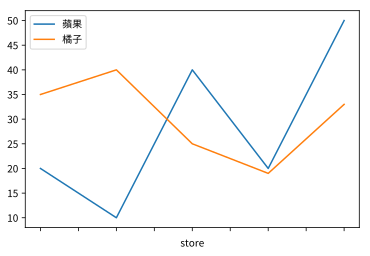

In [33]:
df.plot()

In [10]:
import numpy as np
np.random.seed(0)

ts = pd.Series(np.random.randn(1000), index=pd.date_range('2018-01-01', periods=1000)).cumsum()
ts.head()

2018-01-01    1.764052
2018-01-02    2.164210
2018-01-03    3.142948
2018-01-04    5.383841
2018-01-05    7.251399
Freq: D, dtype: float64

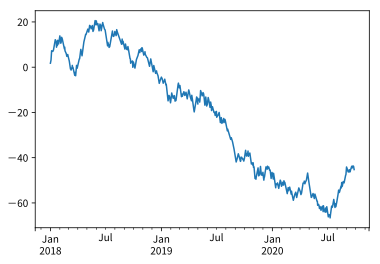

In [11]:
ts.plot()

**Bar plot**

- Index => `x`
- Values => `y axis`
- Columns => `color`

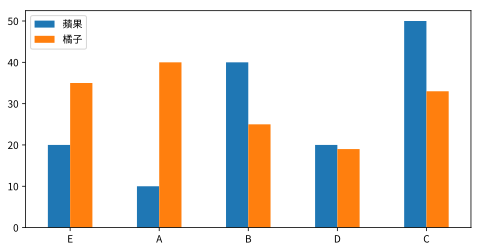

In [12]:
df.plot(kind='bar',
        figsize=(8,4), # set fig size
        rot=0)  # rotate xticklabels

In [ ]:
df.plot(kind='barh',
        figsize=(8, 4), # set fig size
        rot=0)  # rotate xticklabels

**Scatter plot**: Specify 2 columns for x, y

In [ ]:
df.plot(kind='scatter', x='蘋果', y='橘子')
# scatter requires and x and y column

### One-var plots

In [ ]:
df['蘋果'].plot.kde()

In [ ]:
df['蘋果'].plot(kind='box', title='Boxplot')

In [ ]:
df.plot(kind='box', title='Boxplot')

In [ ]:
ax = df['蘋果'].plot.pie()
ax.axis('equal');
ax.set_ylabel('');

In [ ]:
axes = df.plot.pie(subplots=True, legend=False)
_ = [ax.axis('equal') for ax in axes]

## Small-multiples: subplots in pandas with matplotlib

1. 手動 `plt.subplots()`
2. `DataFrame.plot(subplots=True)`: columns => `facets`

### 1. 手動 plt.subplot()

In [ ]:
fig, ax_array = plt.subplots(2, 3, figsize=(10, 5))
fig.suptitle('My plot', size=20);

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
fig.suptitle('My Plots', size=16, y=1.1)

df['蘋果'].plot(kind='bar', ax=ax1, color='grey', rot=0, title='蘋果')
df['橘子'].plot(kind='bar', ax=ax2, color='grey', rot=0, title='橘子')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
fig.suptitle('My Plots', size=16, y=1.1)

df['蘋果'].sort_values(ascending=False).plot(kind='bar', ax=ax1, color='grey', rot=0, title='蘋果')
df['橘子'].sort_values(ascending=False).plot(kind='bar', ax=ax2, color='grey', rot=0, title='橘子')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3))
fig.suptitle('My Plots', size=16, y=1.1)

df.plot(kind='line', ax=ax1, title='Line plot')
df.plot(x='蘋果', y='橘子', kind='scatter',
     ax=ax2, title='Scatterplot')
df.plot(kind='bar', ax=ax3, title='Bar plot')

### 2. Subplots=True

In [ ]:
df.plot.bar(subplots=True, figsize=(8,3), rot=0,
            layout=(1, 2)) # layout for subplots

# 手動增加 Title
fig = plt.gcf()
fig.suptitle('My Plots');

In [ ]:
df.plot.bar(subplots=True, figsize=(8,3), rot=0, layout=(1, 2),
            legend=False) # turn off legend

In [ ]:
df.plot.bar(subplots=True, figsize=(8,3), rot=0, layout=(1, 2),
            legend=False, title=['', '']) # turn off legend

# 手動增加 legend
_ = [ax.legend(loc=0) for ax in plt.gcf().axes]

In [ ]:
df.plot.bar(subplots=True, figsize=(8,3), rot=0, layout=(1, 2),
            sharey=True)  # mark only on one side

### More complicated exmple

In [ ]:
import numpy as np

In [ ]:
# Generate random data
df2 = pd.DataFrame(np.random.randn(96,12),
                  columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                           'K', 'L'])
df2.head()

In [ ]:
df2.plot(kind='line', style='-', figsize=(8, 4))

In [ ]:
df2.plot(
    kind='line',
    style='-', # matplotlib line style (fmt) per column
               # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
    subplots=True,
    grid=True,
    title="Sample Data (Unit)",
    figsize=(8, 4),
    layout=(3, 4),
    sharex=True, sharey=True,
    legend=True,
    xticks=np.arange(0, len(df), 16),
)

plt.tight_layout()

_ = [ax.legend(loc=1) for ax in plt.gcf().axes] # 調整 legend 位置

## Save your visualizations from the Jupyter Notebook

In [ ]:
plt.savefig('./destfile.png', dpi = 300)

---

## Pandas - Data aggregation and plot

In [13]:
titanic = pd.read_csv('http://bit.ly/titanicdata')
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [15]:
titanic['survived'] = titanic.survived.astype(bool)
titanic.dtypes

survived       bool
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

### 男性還是女性生還率高？

In [16]:
titanic.groupby(['sex', 'survived']).size().unstack()

survived,False,True
sex,,
female,81,233
male,468,109


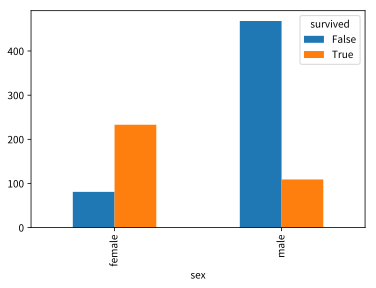

In [17]:
titanic.groupby(['sex', 'survived']).size().unstack().plot.bar()

In [18]:
titanic.groupby(['sex'])['survived'].value_counts().unstack()

survived,False,True
sex,,
female,81,233
male,468,109


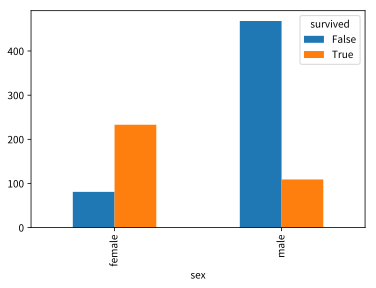

In [19]:
titanic.groupby(['sex'])['survived'].value_counts().unstack().plot.bar()

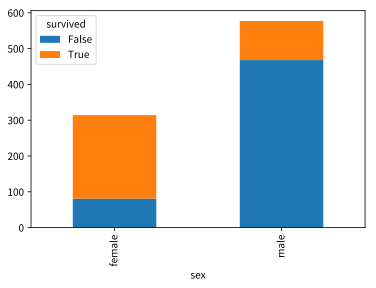

In [20]:
titanic.groupby(['sex'])['survived'].value_counts().unstack().plot.bar(stacked=True)

### 3 variables

In [21]:
df_pclass = titanic.groupby(['survived', 'sex', 'pclass'])['name'].count().unstack()
df_pclass

pclass            1   2    3
survived sex                
False    female   3   6   72
         male    77  91  300
True     female  91  70   72
         male    45  17   47

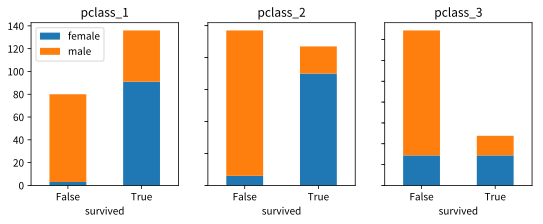

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3)

for i, col in enumerate(df_pclass.columns):
    df_pclass[col].unstack().plot(
        ax=axes[i],
        kind='bar',
        stacked=True,
        title= 'pclass_' + str(col),
        sharey=True,
        legend=False,
        rot=0,
        figsize=(9, 3))

axes[0].legend(loc=0)

## Resources

- [Pandas visualization](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.line.html)
- [The Python Graph Gallery](https://python-graph-gallery.com/)